In [1]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

In [2]:
headers=['Interval','Timestamp','Flume Depth (mm)','AV Flow (L/s)', 'Flume Flow (L/s)', 'Precipitation (mm)']
df = pd.read_csv ('sani_clean.csv', names=headers)
df=df[1:]
# df=df.astype(float)
df.head()

,Interval,Timestamp,Flume Depth (mm),AV Flow (L/s),Flume Flow (L/s),Precipitation (mm)
1,15 Min,2021-04-01 0:15,14.16,0.4,0.22,0
2,15 Min,2021-04-01 0:30,14.95,0.24,0.29,0
3,15 Min,2021-04-01 0:45,14.88,0.15,0.21,0
4,15 Min,2021-04-01 1:00,13.1,0.17,0.21,0
5,15 Min,2021-04-01 1:15,13.96,0.23,0.21,0


In [3]:
date_time = pd.to_datetime(df.pop('Timestamp'), format='%Y-%m-%d %H:%M:')

In [4]:
df=df[['Flume Depth (mm)','AV Flow (L/s)', 'Flume Flow (L/s)','Precipitation (mm)']].astype(float)

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Flume Depth (mm),998.0,15.125701,2.623974,9.46,13.30,14.88,16.47,28.78
AV Flow (L/s),998.0,0.290090,0.222161,0.00,0.11,0.26,0.42,1.69
Flume Flow (L/s),998.0,0.260080,0.092550,0.11,0.20,0.24,0.30,0.91
Precipitation (mm),998.0,0.023046,0.130772,0.00,0.00,0.00,0.00,1.90


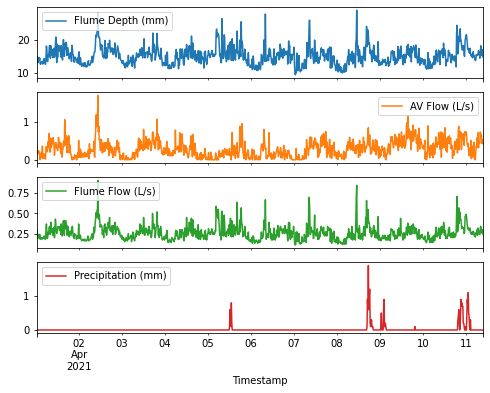

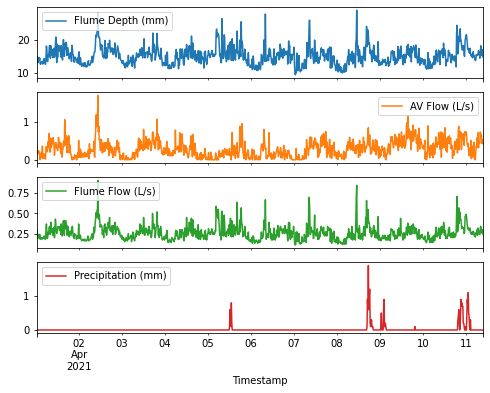

In [6]:
plot_cols = ['Flume Depth (mm)','AV Flow (L/s)', 'Flume Flow (L/s)','Precipitation (mm)']#'T (degC)', 'p (mbar)', 'rho (g/m**3)']
plot_features = df[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)

plot_features = df[plot_cols][:1000]
plot_features.index = date_time[:1000]
_ = plot_features.plot(subplots=True)

In [7]:
timestamp_s = date_time.map(pd.Timestamp.timestamp)

In [8]:
day = 24*60*60
year = (365.2425)*day
df['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
df['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
df['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
df['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))

Text(0.5, 1.0, 'Time of day signal')

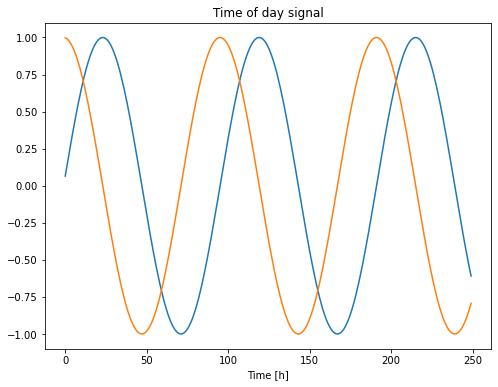

In [9]:
plt.plot(np.array(df['Day sin'])[:250])
plt.plot(np.array(df['Day cos'])[:250])
plt.xlabel('Time [h]')
plt.title('Time of day signal')

In [10]:
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from matplotlib import pyplot as plt

In [11]:
master_url_root = "https://raw.githubusercontent.com/numenta/NAB/master/data/"

df_small_noise_url_suffix = "artificialNoAnomaly/art_daily_small_noise.csv"
df_small_noise_url = master_url_root + df_small_noise_url_suffix
df_small_noise = pd.read_csv(
    df_small_noise_url, parse_dates=True, index_col="timestamp"
)

df_daily_jumpsup_url_suffix = "artificialWithAnomaly/art_daily_jumpsup.csv"
df_daily_jumpsup_url = master_url_root + df_daily_jumpsup_url_suffix
df_daily_jumpsup = pd.read_csv(
    df_daily_jumpsup_url, parse_dates=True, index_col="timestamp"
)

In [12]:
headers=['Interval','Timestamp','Flume Depth (mm)','AV Flow (L/s)', 'Flume Flow (L/s)', 'Precipitation (mm)']
df_2 = pd.read_csv ('sani_anomaly.csv', names=headers)

df_2=df_2[1:]
# df_2=df_2.astype(float)


In [13]:
df_2=df_2.drop(columns=['Interval','Timestamp'])
df_2=df_2.astype(float)
df_2.head()

,Flume Depth (mm),AV Flow (L/s),Flume Flow (L/s),Precipitation (mm)
1,14.16,0.40,0.22,0.0
2,14.95,0.24,0.29,0.0
3,14.88,0.15,0.21,0.0
4,13.10,0.17,0.21,0.0
5,13.96,0.23,0.21,0.0


In [14]:
df_2.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Flume Depth (mm),998.0,15.125701,2.623974,9.46,13.30,14.88,16.47,28.78
AV Flow (L/s),998.0,-3.632134,19.444652,-100.00,0.09,0.24,0.40,1.69
Flume Flow (L/s),998.0,0.260080,0.092550,0.11,0.20,0.24,0.30,0.91
Precipitation (mm),1093.0,0.021043,0.125123,0.00,0.00,0.00,0.00,1.90


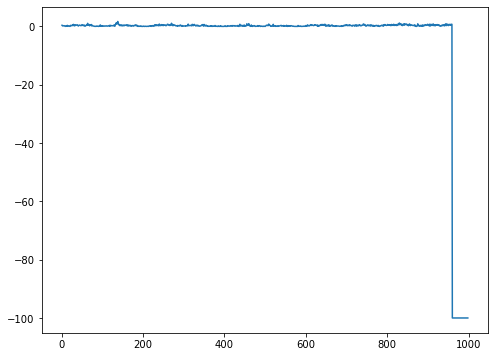

In [15]:
fig, ax = plt.subplots()
# df.plot(legend=False, ax=ax)
df_2['AV Flow (L/s)'].plot(legend=False, ax=ax)

plt.show()

In [16]:
timestamp_s


1      1.617236e+09
2      1.617237e+09
3      1.617238e+09
4      1.617239e+09
5      1.617240e+09
           ...     
994    1.618130e+09
995    1.618131e+09
996    1.618132e+09
997    1.618132e+09
998    1.618133e+09
Name: Timestamp, Length: 998, dtype: float64

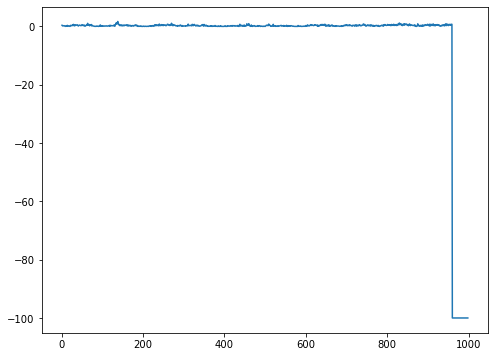

In [17]:
fig, ax = plt.subplots()
df_2['AV Flow (L/s)'].plot(legend=False, ax=ax)
plt.show()

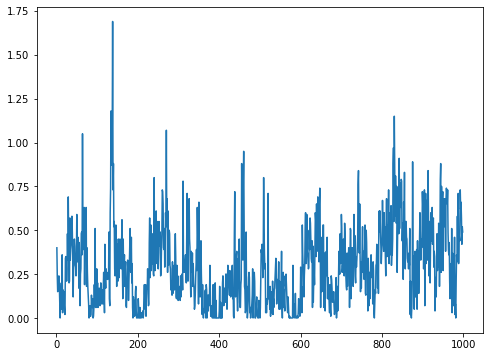

In [18]:
fig, ax = plt.subplots()
df['AV Flow (L/s)'].plot(legend=False, ax=ax)
plt.show()

In [19]:
df.head()

,Flume Depth (mm),AV Flow (L/s),Flume Flow (L/s),Precipitation (mm),Day sin,Day cos,Year sin,Year cos
1,14.16,0.40,0.22,0.0,0.065403,0.997859,0.999934,0.011486
2,14.95,0.24,0.29,0.0,0.130526,0.991445,0.999936,0.011307
3,14.88,0.15,0.21,0.0,0.195090,0.980785,0.999938,0.011128
4,13.10,0.17,0.21,0.0,0.258819,0.965926,0.999940,0.010949
5,13.96,0.23,0.21,0.0,0.321439,0.946930,0.999942,0.010769


In [20]:
training_mean = df['AV Flow (L/s)'].mean()
training_std = df['AV Flow (L/s)'].std()
df_training_value = (df['AV Flow (L/s)'] - training_mean) / training_std
print("Number of training samples:", len(df_training_value))

Number of training samples: 998


In [21]:
TIME_STEPS = 288

# Generated training sequences for use in the model.
def create_sequences(values, time_steps=TIME_STEPS):
    output = []
    for i in range(len(values) - time_steps + 1):
        output.append(values[i : (i + time_steps)])
    return np.stack(output)


x_train = create_sequences(df_training_value.values)
print("Training input shape: ", x_train.shape)

Training input shape:  (711, 288)


In [22]:
x_train = x_train[..., None]
x_train.shape

(711, 288, 1)

In [23]:
x_train.shape[2]

1

In [24]:
model = keras.Sequential(
    [
        layers.Input(shape=(x_train.shape[1], x_train.shape[2])),
        layers.Conv1D(
            filters=32, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Dropout(rate=0.2),
        layers.Conv1D(
            filters=16, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Conv1DTranspose(
            filters=16, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Dropout(rate=0.2),
        layers.Conv1DTranspose(
            filters=32, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Conv1DTranspose(filters=1, kernel_size=7, padding="same"),
    ]
)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss="mse")
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 144, 32)           256       
_________________________________________________________________
dropout (Dropout)            (None, 144, 32)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 72, 16)            3600      
_________________________________________________________________
conv1d_transpose (Conv1DTran (None, 144, 16)           1808      
_________________________________________________________________
dropout_1 (Dropout)          (None, 144, 16)           0         
_________________________________________________________________
conv1d_transpose_1 (Conv1DTr (None, 288, 32)           3616      
_________________________________________________________________
conv1d_transpose_2 (Conv1DTr (None, 288, 1)            2

2022-04-01 19:10:54.770765: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-04-01 19:10:54.770842: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-04-01 19:10:54.770881: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (a7e5c673c2b1): /proc/driver/nvidia/version does not exist
2022-04-01 19:10:54.771151: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [25]:
history = model.fit(
    x_train,
    x_train,
    epochs=50,
    batch_size=32,
    validation_split=0.1,
    callbacks=[
        keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="min")
    ],
)

2022-04-01 19:10:54.954101: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50
20/20 [==============================] - 1s 26ms/step - loss: 0.6871 - val_loss: 0.5075
Epoch 2/50
20/20 [==============================] - 0s 17ms/step - loss: 0.3755 - val_loss: 0.3767
Epoch 3/50
20/20 [==============================] - 0s 16ms/step - loss: 0.2776 - val_loss: 0.2527
Epoch 4/50
20/20 [==============================] - 0s 15ms/step - loss: 0.2073 - val_loss: 0.1916
Epoch 5/50
20/20 [==============================] - 0s 16ms/step - loss: 0.1621 - val_loss: 0.1204
Epoch 6/50
20/20 [==============================] - 0s 15ms/step - loss: 0.1269 - val_loss: 0.0707
Epoch 7/50
20/20 [==============================] - 0s 17ms/step - loss: 0.1047 - val_loss: 0.0518
Epoch 8/50
20/20 [==============================] - 0s 16ms/step - loss: 0.0925 - val_loss: 0.0445
Epoch 9/50
20/20 [==============================] - 0s 15ms/step - loss: 0.0854 - val_loss: 0.0409
Epoch 10/50
20/20 [==============================] - 0s 16ms/step - loss: 0.0798 - val_loss: 0.0371
Epoch 11/

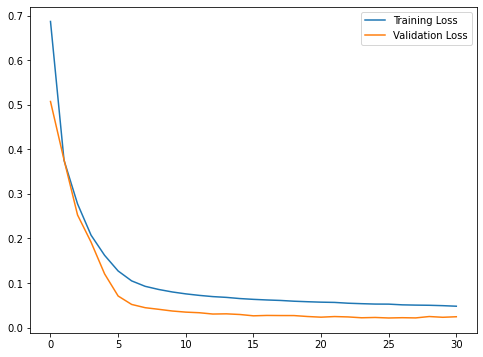

In [26]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.show()

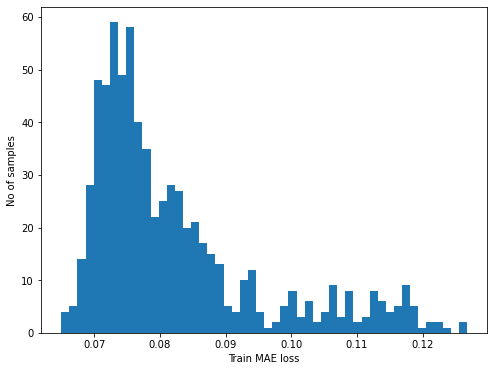

Reconstruction error threshold:  0.1267507487302328


In [27]:
# Get train MAE loss.
x_train_pred = model.predict(x_train)
train_mae_loss = np.mean(np.abs(x_train_pred - x_train), axis=1)

plt.hist(train_mae_loss, bins=50)
plt.xlabel("Train MAE loss")
plt.ylabel("No of samples")
plt.show()

# Get reconstruction loss threshold.
threshold = np.max(train_mae_loss)
print("Reconstruction error threshold: ", threshold)

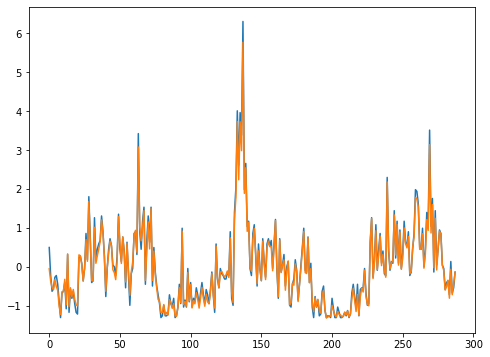

In [28]:
# Checking how the first sequence is learnt
plt.plot(x_train[0])
plt.plot(x_train_pred[0])
plt.show()

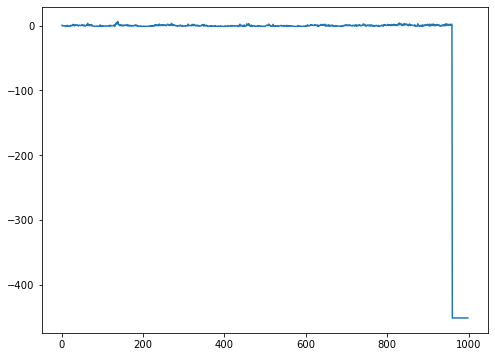

Test input shape:  (26112, 288, 1)


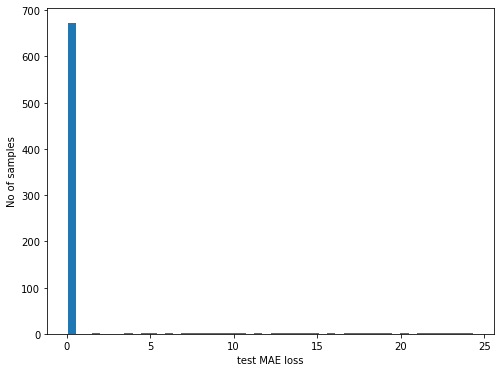

Number of anomaly samples:  39
Indices of anomaly samples:  (array([672, 673, 674, 675, 676, 677, 678, 679, 680, 681, 682, 683, 684,
       685, 686, 687, 688, 689, 690, 691, 692, 693, 694, 695, 696, 697,
       698, 699, 700, 701, 702, 703, 704, 705, 706, 707, 708, 709, 710]),)


In [30]:
df_test_value = (df_2['AV Flow (L/s)'] - training_mean) / training_std
fig, ax = plt.subplots()
df_test_value.plot(legend=False, ax=ax)
plt.show()

# Create sequences from test values.
x_test = create_sequences(df_test_value.values)
x_test = x_test[..., None]
print("Test input shape: ", x_test.shape)

# Get test MAE loss.
x_test_pred = model.predict(x_test)
test_mae_loss = np.mean(np.abs(x_test_pred - x_test), axis=1)
test_mae_loss = test_mae_loss.reshape((-1))

plt.hist(test_mae_loss, bins=50)
plt.xlabel("test MAE loss")
plt.ylabel("No of samples")
plt.show()

# Detect all the samples which are anomalies.
anomalies = test_mae_loss > threshold
print("Number of anomaly samples: ", np.sum(anomalies))
print("Indices of anomaly samples: ", np.where(anomalies))

In [31]:
# data i is an anomaly if samples [(i - timesteps + 1) to (i)] are anomalies
anomalous_data_indices = []
for data_idx in range(TIME_STEPS - 1, len(df_test_value) - TIME_STEPS + 1):
    if np.all(anomalies[data_idx - TIME_STEPS + 1 : data_idx]):
        anomalous_data_indices.append(data_idx)

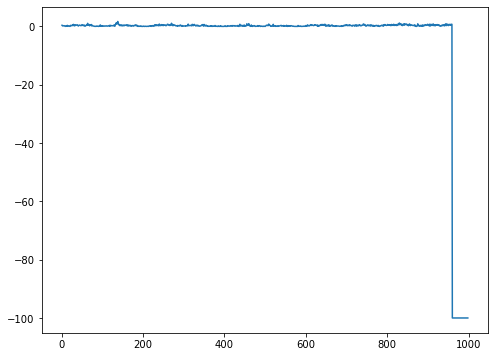

In [32]:
df_subset = df_2['AV Flow (L/s)'].iloc[anomalous_data_indices]
fig, ax = plt.subplots()
df_2['AV Flow (L/s)'].plot(legend=False, ax=ax)
df_subset.plot(legend=False, ax=ax, color="r")
plt.show()